## The main Objective of the Project is to predict the price of the item in the store using various regression model(since the target is a numeric column)

In [1]:
# Importing the required library

# Numpy and Pandas
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import plot_tree

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,LeaveOneOut,cross_val_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error,r2_score

# Data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Grid Search
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Checking the null values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### EDA

### Univariate - Understanding the Numerical columns

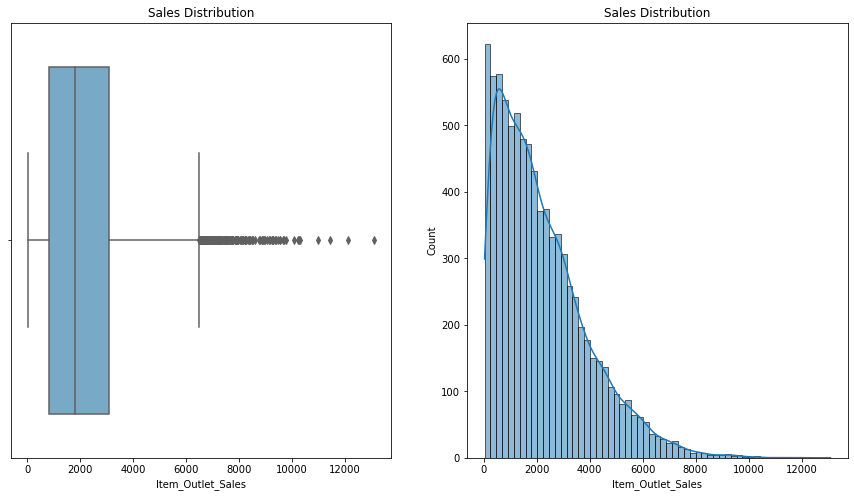

In [6]:
### Finding if there are outliers in sales column to fill the data

fig,ax = plt.subplots(1,2,figsize = (15,8))


sb.boxplot(x = df.Item_Outlet_Sales,ax = ax[0],palette='Blues')
ax[0].set_title('Sales Distribution')


sb.histplot(x = df.Item_Outlet_Sales,ax = ax[1],palette='Blues',kde=True)
plt.title('Sales Distribution')


plt.show()


* The values ranges from 0 to 13000 which means there can be outliers
* From the box plot we can see the outliers

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

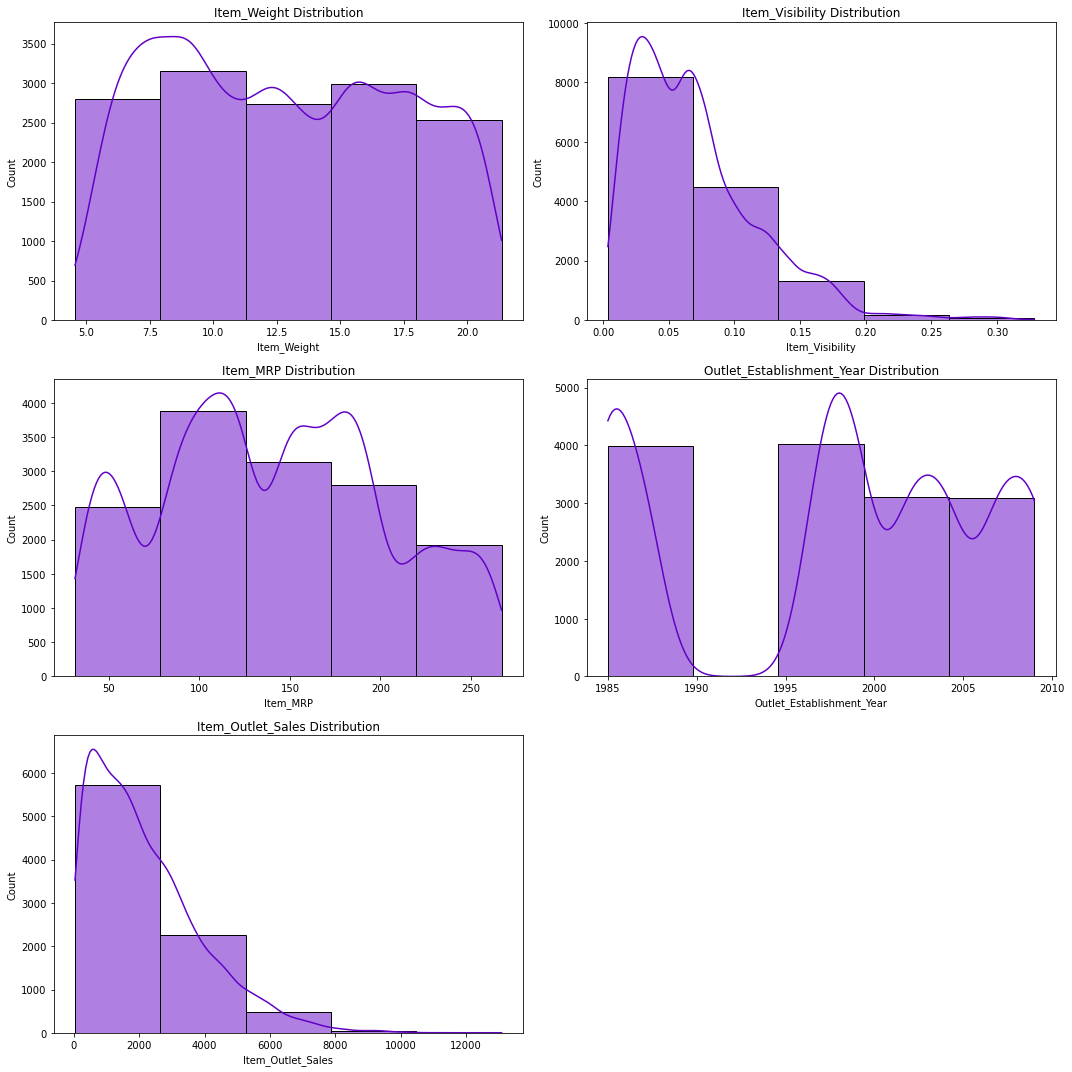

In [8]:
# For all numerical column understanding the distribution

fig,ax = plt.subplots(1,2,figsize = (15,15))
color = sb.color_palette('gnuplot')[0:1]

# For numerical Colums
numerics = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year',
            'Item_Outlet_Sales']

a = 1
for i in numerics:
    plt.subplot(3,2,a)
    sb.histplot(x = df[i],color=color,kde=True,bins = 5)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The distribution of visibility and Sales is right skewed data
* Item mrp and item-weight can be said to have a normal distribution


### Univarite - Understanding about the outliers

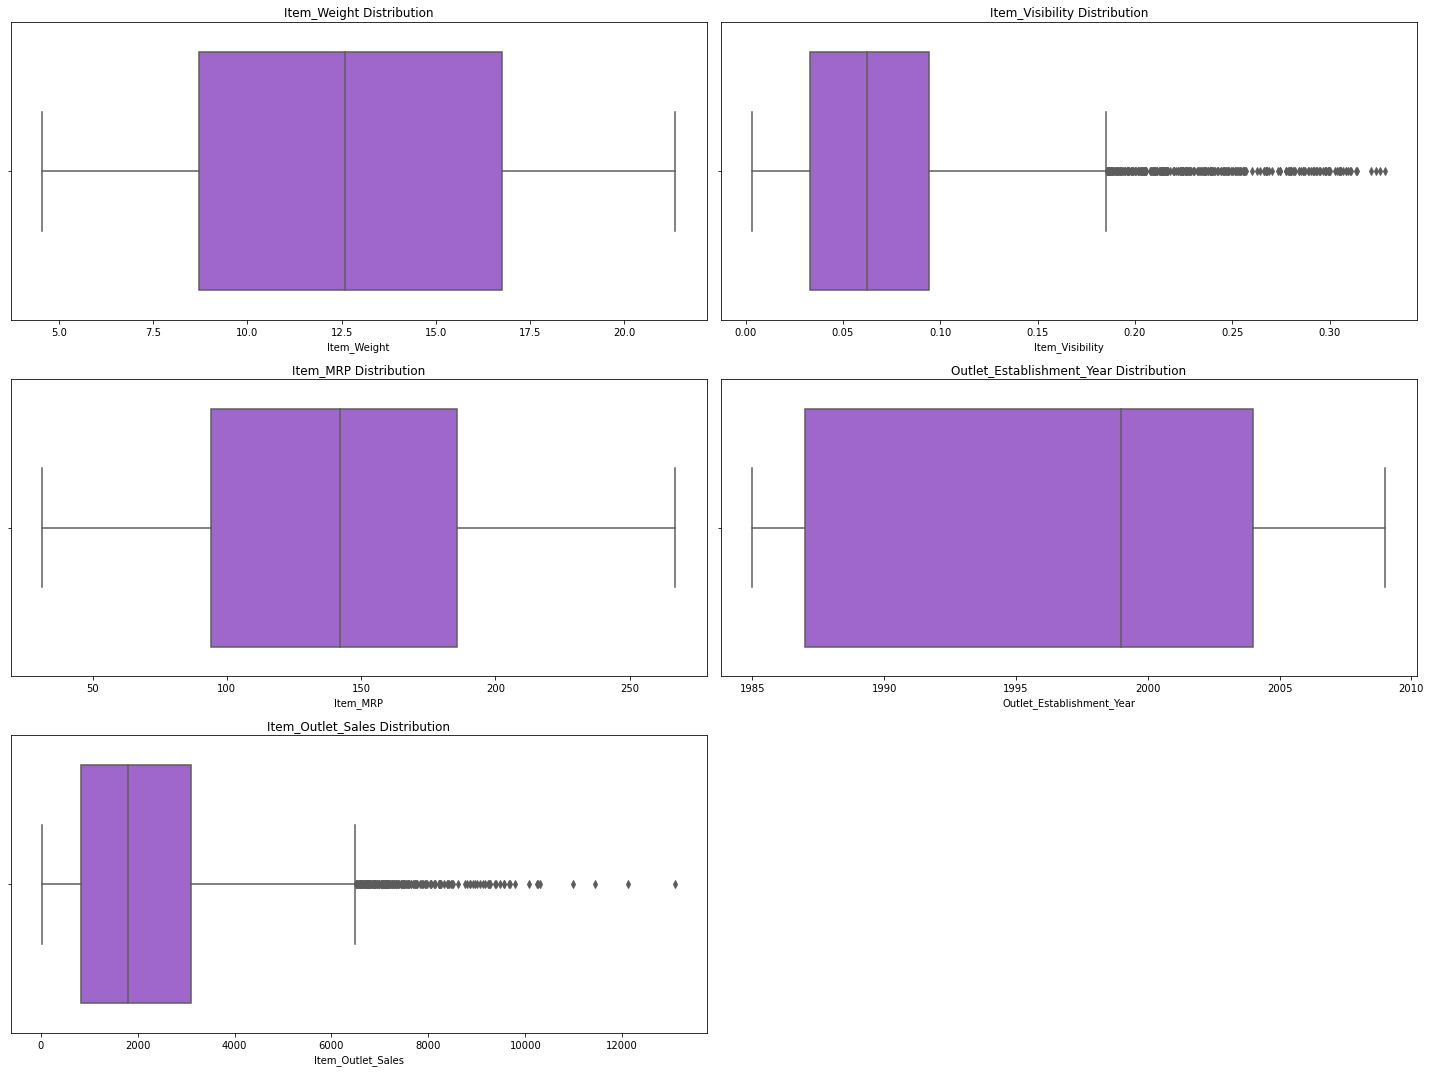

In [9]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
color = sb.color_palette('hls',8)[6:7]

numerics = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year',
            'Item_Outlet_Sales']
a = 1
for i in numerics:
    plt.subplot(3,2,a)
    sb.boxplot(x = df[i],palette=color)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The Item visbility and the Sales have outliers as per the box plot
* But the these data cannot be infered as the outliers without the doimain knowlege
* We cannot simply drop the data just for the purpose of getting a good fit model
* Hence we are going to use this data as such 

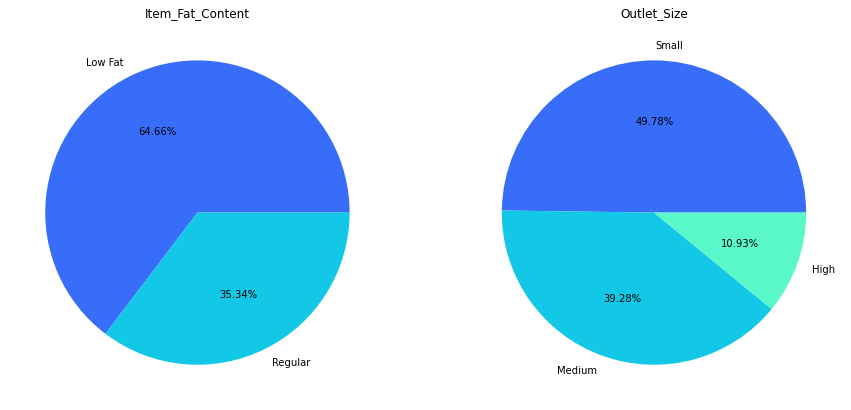

In [10]:
# Pie Charts of Income_Bracket
fig,ax = plt.subplots(figsize=(15,7))

color = sb.color_palette('rainbow')[0:2]
color1 = sb.color_palette('rainbow')[0:3]
plt.subplot(121)
data = df['Item_Fat_Content'].value_counts()
label = data.keys()
plt.pie(data,labels=label,autopct='%.2f%%',colors=color)
plt.title('Item_Fat_Content')


plt.subplot(122)
data = df['Outlet_Size'].value_counts()
label = data.keys()
plt.pie(data,labels=label,autopct='%.2f%%',colors=color1)
plt.title('Outlet_Size')

plt.show()

* From the pie charts we understand the % distribution of item fat content and Outlet size
* More number of low fat contents are having more sales than regular products
* More number of small stores followed by medium 

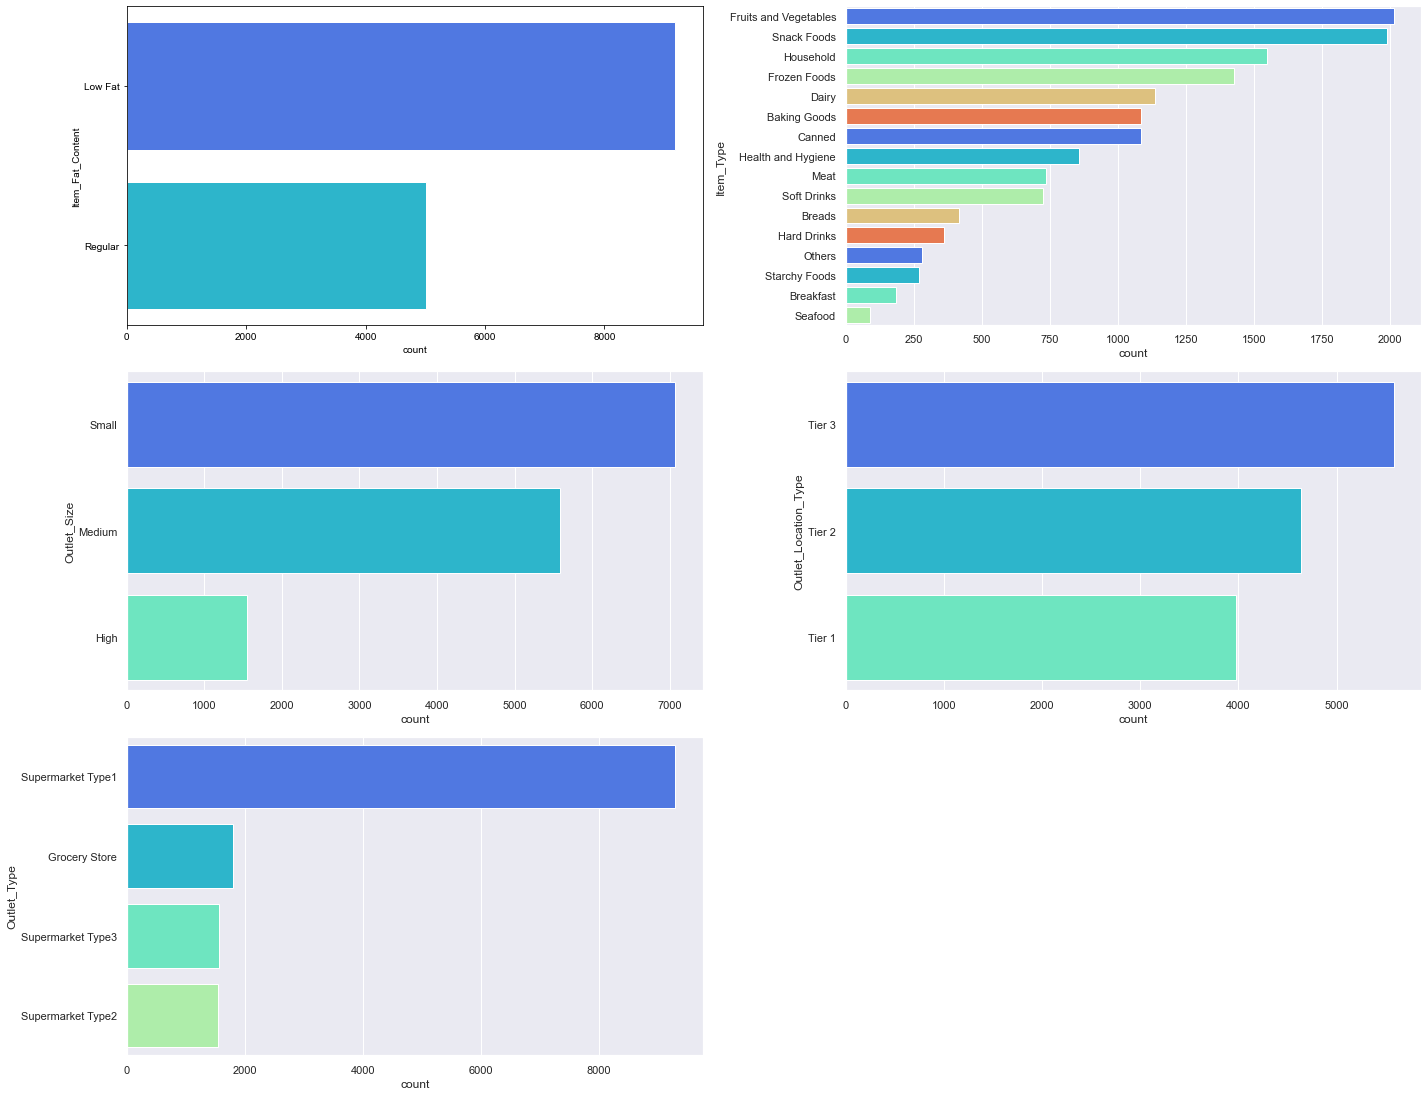

In [11]:
# Understanding all the Categorical column
#considering Categorical Columns -- Barchart
categorical_columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type',
                     'Outlet_Type']

a = 1
plt.figure(figsize = (20,20))
for col in categorical_columns:
    plt.subplot(4,2,a)
    plt.xlabel(col)
    sb.set(style="darkgrid")
    sb.countplot(y = df[col],palette=sb.color_palette('rainbow'),order = df[col].value_counts().index)
    a = a+1
plt.tight_layout()
plt.show() 

* More number of fruits and veg are sold than any other food items
* The sales of seafood is very low
* Supermarjket market type 1 has more sales than other outlet type
* There are more small sized stores
* Low fat contents are sold more than regular contents
* There are more number of tier-3 outlets

### Bivarite - Understanding about the Categorical columns with Target Column

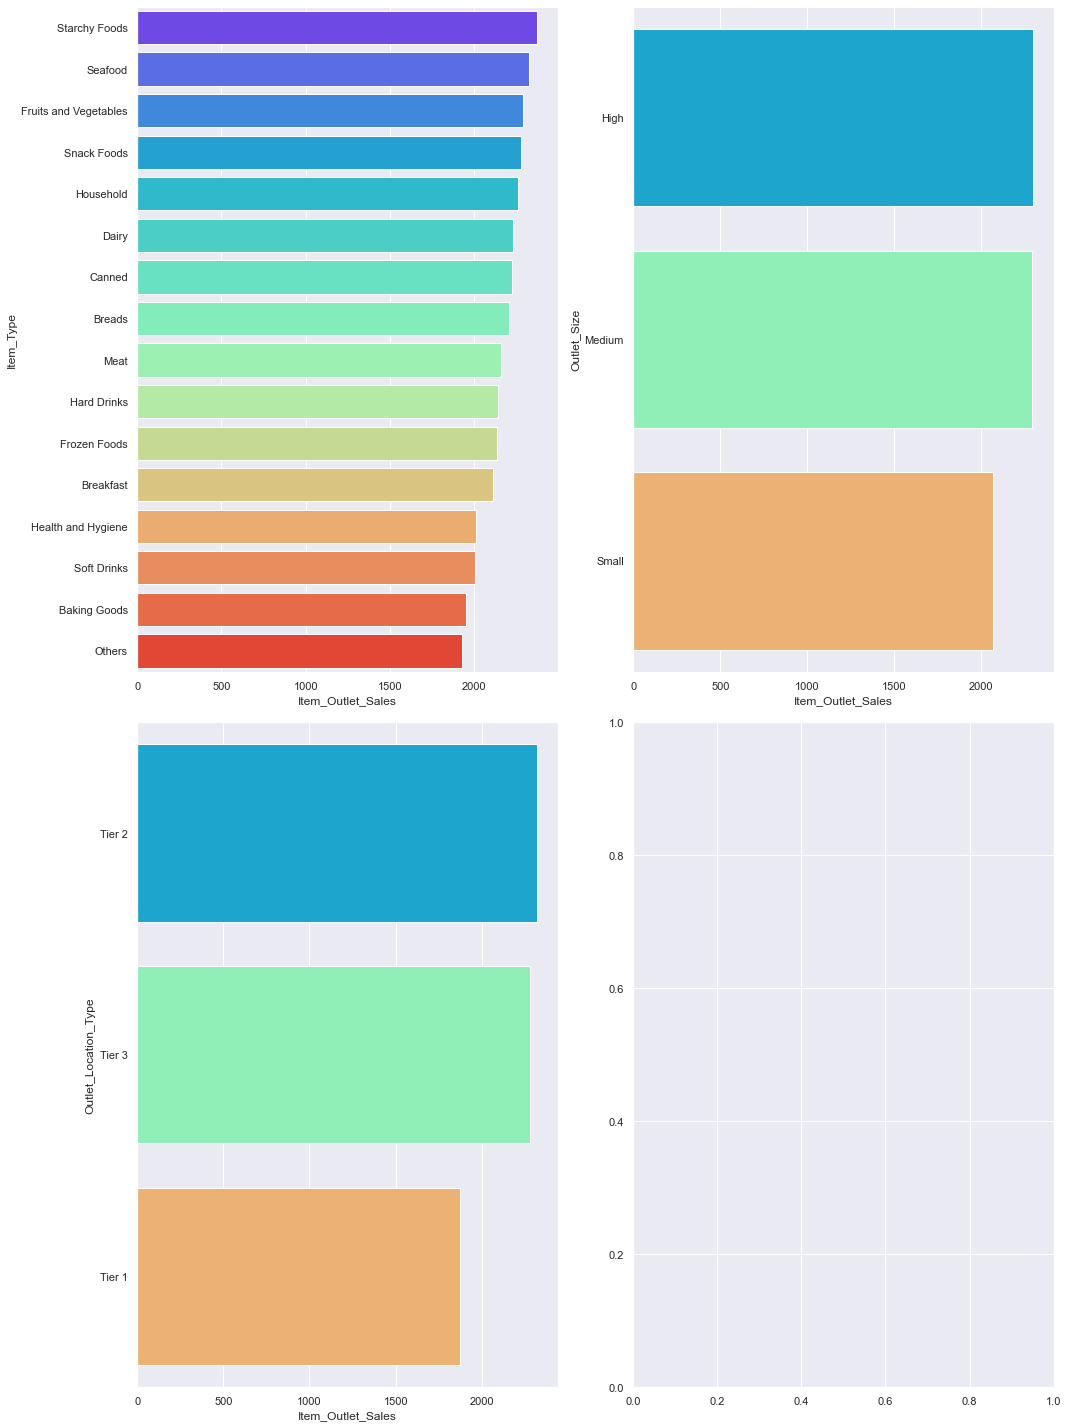

In [12]:
# Comparing the data using the target column Bivariate analysis

fig,ax = plt.subplots(2,2,figsize = (15,20))

order1 = df.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
order2 = df.groupby('Outlet_Size').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
order3 = df.groupby('Outlet_Location_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
#order4 = df.groupby('Outlet_Location_Type').mean().sort_values(by='Item_Fat_Content', ascending=False).index

sb.barplot(data = df,x = 'Item_Outlet_Sales',y = 'Item_Type',order = order1,ax = ax[0,0],ci = False,palette='rainbow')
sb.barplot(data = df,x = 'Item_Outlet_Sales',y = 'Outlet_Size',order=order2,ax = ax[0,1],ci = False,palette='rainbow')
sb.barplot(data = df,x = 'Item_Outlet_Sales',y = 'Outlet_Location_Type',order=order3,ax = ax[1,0],ci = False,palette='rainbow')
#sb.barplot(data = df,x = 'Item_Outlet_Sales',y = 'Item_Fat_Content',order=order4,ax = ax[1,1],ci = False,palette=color)


plt.tight_layout()
plt.show()

* Starchy foods has more number of sales followed by seafood and fruits-veg
* Stores with high size has highets sales
* Tier-2 two has more sales followed by tier-3

### Bivarite - Understanding about the Numerical columns with Target Column

In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

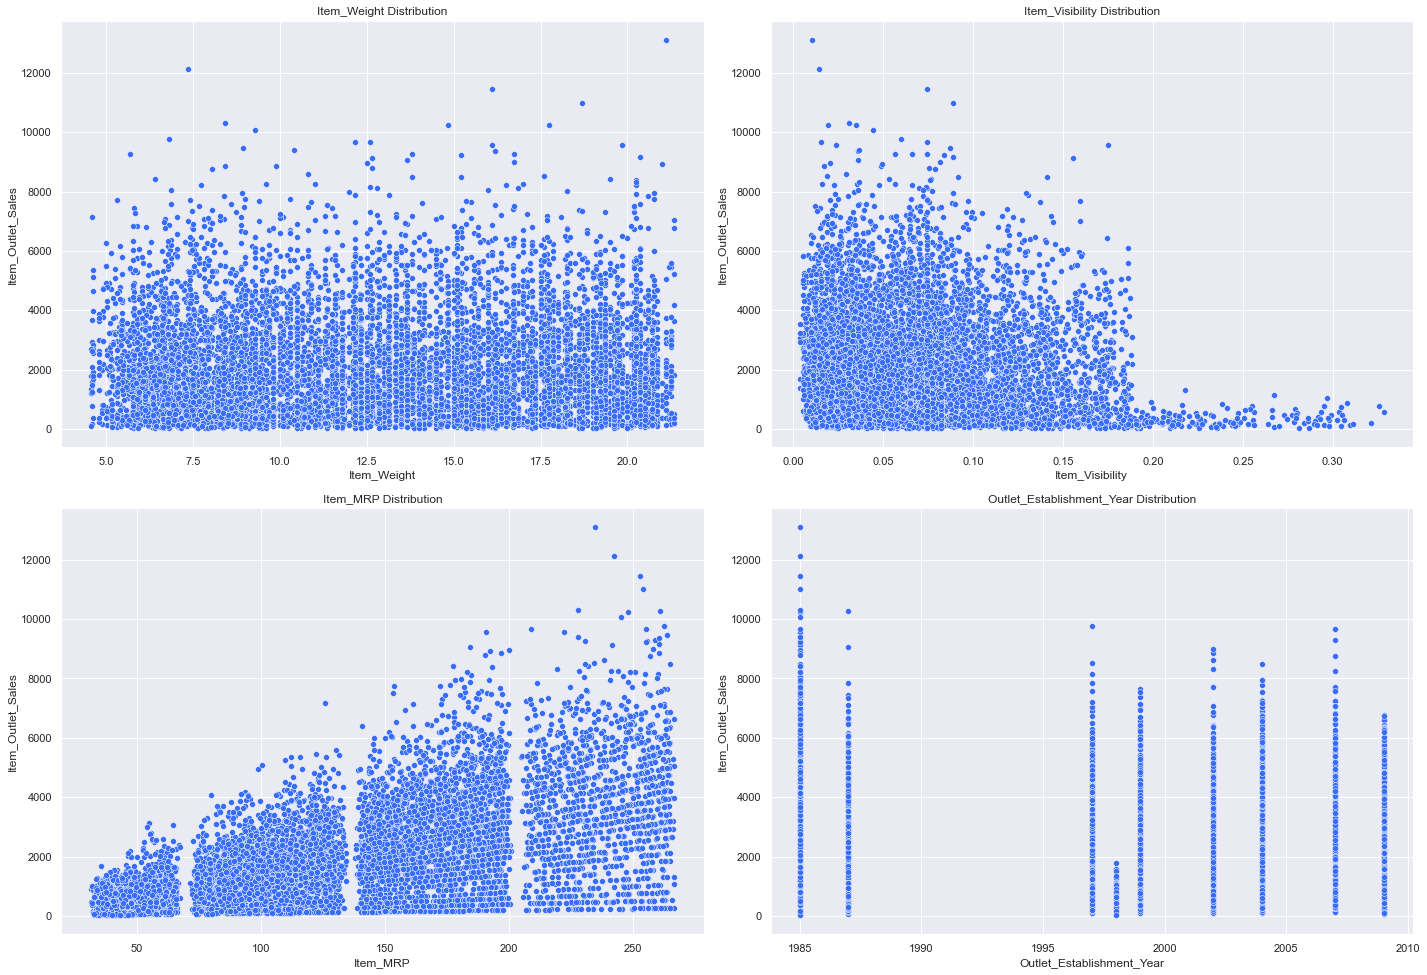

In [14]:
fig,ax = plt.subplots(figsize = (20,20))
color = sb.color_palette('gnuplot')[0:1]

numerics = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
a = 1
for i in numerics:
    plt.subplot(3,2,a)
    sb.scatterplot(x = df[i],y=df['Item_Outlet_Sales'],color = sb.color_palette('rainbow')[0:1])
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* Item weight has less effect with the sales
* Mrp has positive correlation with the sales 
* The outlet which is established earlier has some more number of sales 

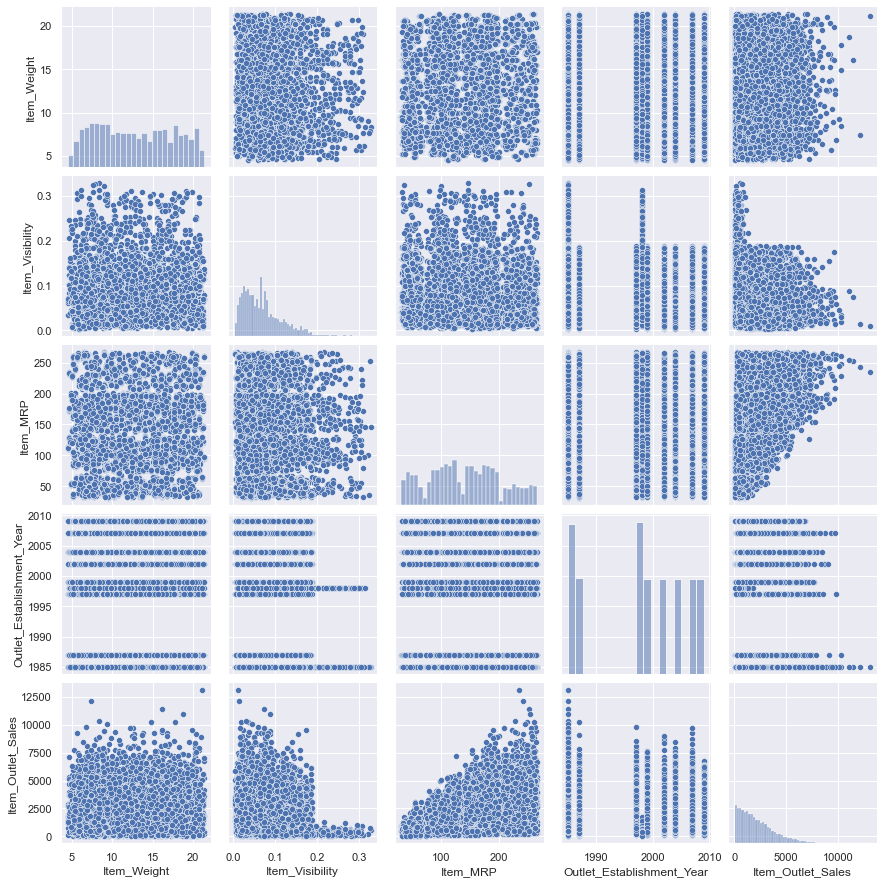

In [15]:
## Scatter plots of all numerical columns

sb.pairplot(df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']],diag_kind = 'hist', diag_kws={'alpha':0.5},palette = 'rainbow') #hue = pca_labelsdiag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster']         
plt.show()

* The pairplot gives a basic idea how the numerical data is distributed 
* Sales are affted by all the features
* Now lets understand how sales is affected by all these features individually

### * Since the sales data has lot of missing data in the sales column, the rows can be dropped 
### * But this leads to lot of unwanted elimination of data and might make the data more biased 
### * We can try using mean and median for the imputation but the data might become more biased 
### * Hence with the available data we can split the data at 70:30 ratio and keep the rest of the data for validation

## Preprocessing the data

### Understanding the data types and convert it to required format

In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
df1 = df.copy()

In [18]:
# df1.columns = df.columns.str.replace(r')

### Converting all object column to label numerical column using label encoder

In [19]:
# Label encoding

label_encoder = LabelEncoder()

for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = label_encoder.fit_transform(df[i])
        
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,NaN
14200,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,NaN
14201,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,NaN
14202,521,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,NaN


### Normalizing all the data

In [20]:
# Normlizing using MINMAX function

scale = MinMaxScaler()
df1 = pd.DataFrame(scale.fit_transform(df1),columns=df1.columns)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


### Feature Selection process

In [21]:
corr = df1.corr()
corr.style.background_gradient(cmap = 'Purples')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002869
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.013261
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.018719
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.135247
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.017048
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.049135
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.060517
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.089367


### Item identifier and outlet identifier is dropped because it doesn't contribute much for the sales
### The correlation between the independant variable is also not very high
### The highest is between sales and item_MRP

In [22]:
df1 = df1.drop(columns=['Item_Identifier','Outlet_Identifier'])
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,0.583333,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,1.000000,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,0.583333,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.541667,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,1.0,0.030546,0.866667,0.467004,0.500000,1.0,0.0,0.333333,NaN
14200,0.181304,1.0,0.429216,1.000000,0.585126,1.000000,0.5,1.0,0.666667,NaN
14201,0.324204,0.0,0.215364,0.533333,0.371199,0.708333,1.0,0.5,0.333333,NaN
14202,0.639774,1.0,0.188211,0.200000,0.778154,0.916667,1.0,0.5,0.333333,NaN


### Splitting the data

In [23]:
# Splitting only the not null values from the dataset
data = df1.loc[df['Item_Outlet_Sales'].notnull(),df1.columns]
validation = df1.loc[df['Item_Outlet_Sales'].isnull(),df1.columns]

In [24]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,0.583333,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,1.000000,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,0.583333,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.541667,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.163812,0.866667,0.777729,0.083333,0.0,1.0,0.333333,0.210293
8519,0.227746,1.0,0.133638,0.000000,0.326263,0.708333,1.0,0.5,0.333333,0.039529
8520,0.359929,0.0,0.097321,0.533333,0.228492,0.791667,1.0,0.5,0.333333,0.088850
8521,0.158083,1.0,0.436080,0.866667,0.304939,1.000000,0.5,1.0,0.666667,0.138835


In [25]:
validation

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,0.964275,0.0,0.012284,0.866667,0.325012,0.583333,0.5,0.0,0.333333,NaN
8524,0.222983,1.0,0.107301,0.266667,0.237819,0.916667,1.0,0.5,0.333333,NaN
8525,0.598095,0.0,0.295552,0.733333,0.893316,0.541667,0.5,1.0,0.000000,NaN
8526,0.164335,0.0,0.036370,0.866667,0.525233,0.916667,1.0,0.5,0.333333,NaN
8527,0.538553,1.0,0.354122,0.266667,0.861381,0.000000,0.5,1.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,1.0,0.030546,0.866667,0.467004,0.500000,1.0,0.0,0.333333,NaN
14200,0.181304,1.0,0.429216,1.000000,0.585126,1.000000,0.5,1.0,0.666667,NaN
14201,0.324204,0.0,0.215364,0.533333,0.371199,0.708333,1.0,0.5,0.333333,NaN
14202,0.639774,1.0,0.188211,0.200000,0.778154,0.916667,1.0,0.5,0.333333,NaN


###  Now splitting the data into train and test using Train and test using hold out method

In [26]:
x = data.drop(columns='Item_Outlet_Sales')
y = data['Item_Outlet_Sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=50)  # Taking 70:30 ratio for train and test
print(f"Shape of Traindata = {x_train.shape} | Testdata = {x_test.shape}")
print(f"Shape of Traindata = {y_train.shape} | Testdata = {y_test.shape}")

Shape of Traindata = (5966, 9) | Testdata = (2557, 9)
Shape of Traindata = (5966,) | Testdata = (2557,)


## Building the models

### Linear regression

In [27]:
# Building Model
lin_model = LinearRegression().fit(x_train,y_train)

# Linear Pred
lin_pred = lin_model.predict(x_test)
lin_pred

array([0.11938674, 0.09934801, 0.06323516, ..., 0.08765241, 0.11688053,
       0.24378864])

### Decision Tree Regressor

In [28]:
## Finding the best hyperparametrs for the decision tree using gridsearch

# Building Model
dtr = DecisionTreeRegressor().fit(x_train,y_train)

params = {
    'max_depth': [2,3,5,10,20,30],
    'min_samples_leaf': [5,10,20,50,100,200]}

grid_search = GridSearchCV(estimator=dtr,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

# Finding best estimator
grid_search.best_estimator_

Fitting 4 folds for each of 36 candidates, totalling 144 fits


DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)

* The grid search method is not giving the best parameters
* Hence i am creating a function to iterate through various hyperparameters and understand the metrics for these parameters

In [29]:
def best_para_dt(depth,min_leaf_sample):
    mse = []
    rmse = []
    depth_l = []
    min_leaf_sample_l = []
    train_acc =[]
    test_acc = []
    for i in depth:
        for j in min_leaf_sample:
            dtr = DecisionTreeRegressor(max_depth=i,min_samples_leaf=j).fit(x_train,y_train)
            tr = dtr.score(x_train,y_train) 
            te = dtr.score(x_test,y_test)
            p = dtr.predict(x_test)
            me = mean_squared_error(y_test,p)
            rms = mean_squared_error(y_test,p,squared = False)
            
            mse.append(me)
            rmse.append(rms)
            train_acc.append(tr*100)
            test_acc.append(te*100)
            depth_l.append(i)
            min_leaf_sample_l.append(j)
        
    d = pd.DataFrame({'Depth':depth_l,
                      'Min_leaf_Sample':min_leaf_sample_l,
                     'Train_acc':train_acc,
                     'Test_acc':test_acc,
                     'MSE':mse,
                     'RMSE':rmse})
    
    return(d) 

In [30]:
depth =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]
sample = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,100,200]
best = best_para_dt(depth,sample)
best.sort_values(by='RMSE',ascending=True)

,Depth,Min_leaf_Sample,Train_acc,Test_acc,MSE,RMSE
111,6,50,61.076078,60.237693,0.006605,0.081270
130,7,50,61.563222,60.048774,0.006636,0.081462
91,5,20,60.392310,59.849967,0.006669,0.081665
92,5,50,60.385675,59.847383,0.006670,0.081668
87,5,12,60.393644,59.843132,0.006670,0.081672
...,...,...,...,...,...,...
2,1,3,23.357305,24.253367,0.012582,0.112169
15,1,20,23.357305,24.253367,0.012582,0.112169
8,1,9,23.357305,24.253367,0.012582,0.112169
266,20,1,96.697009,22.386381,0.012892,0.113543


In [31]:
# Building Model
dtr = DecisionTreeRegressor(max_depth=6,min_samples_leaf=50).fit(x_train,y_train)

# Linear Pred
dtr_pred = lin_model.predict(x_test)
dtr_pred

array([0.11938674, 0.09934801, 0.06323516, ..., 0.08765241, 0.11688053,
       0.24378864])

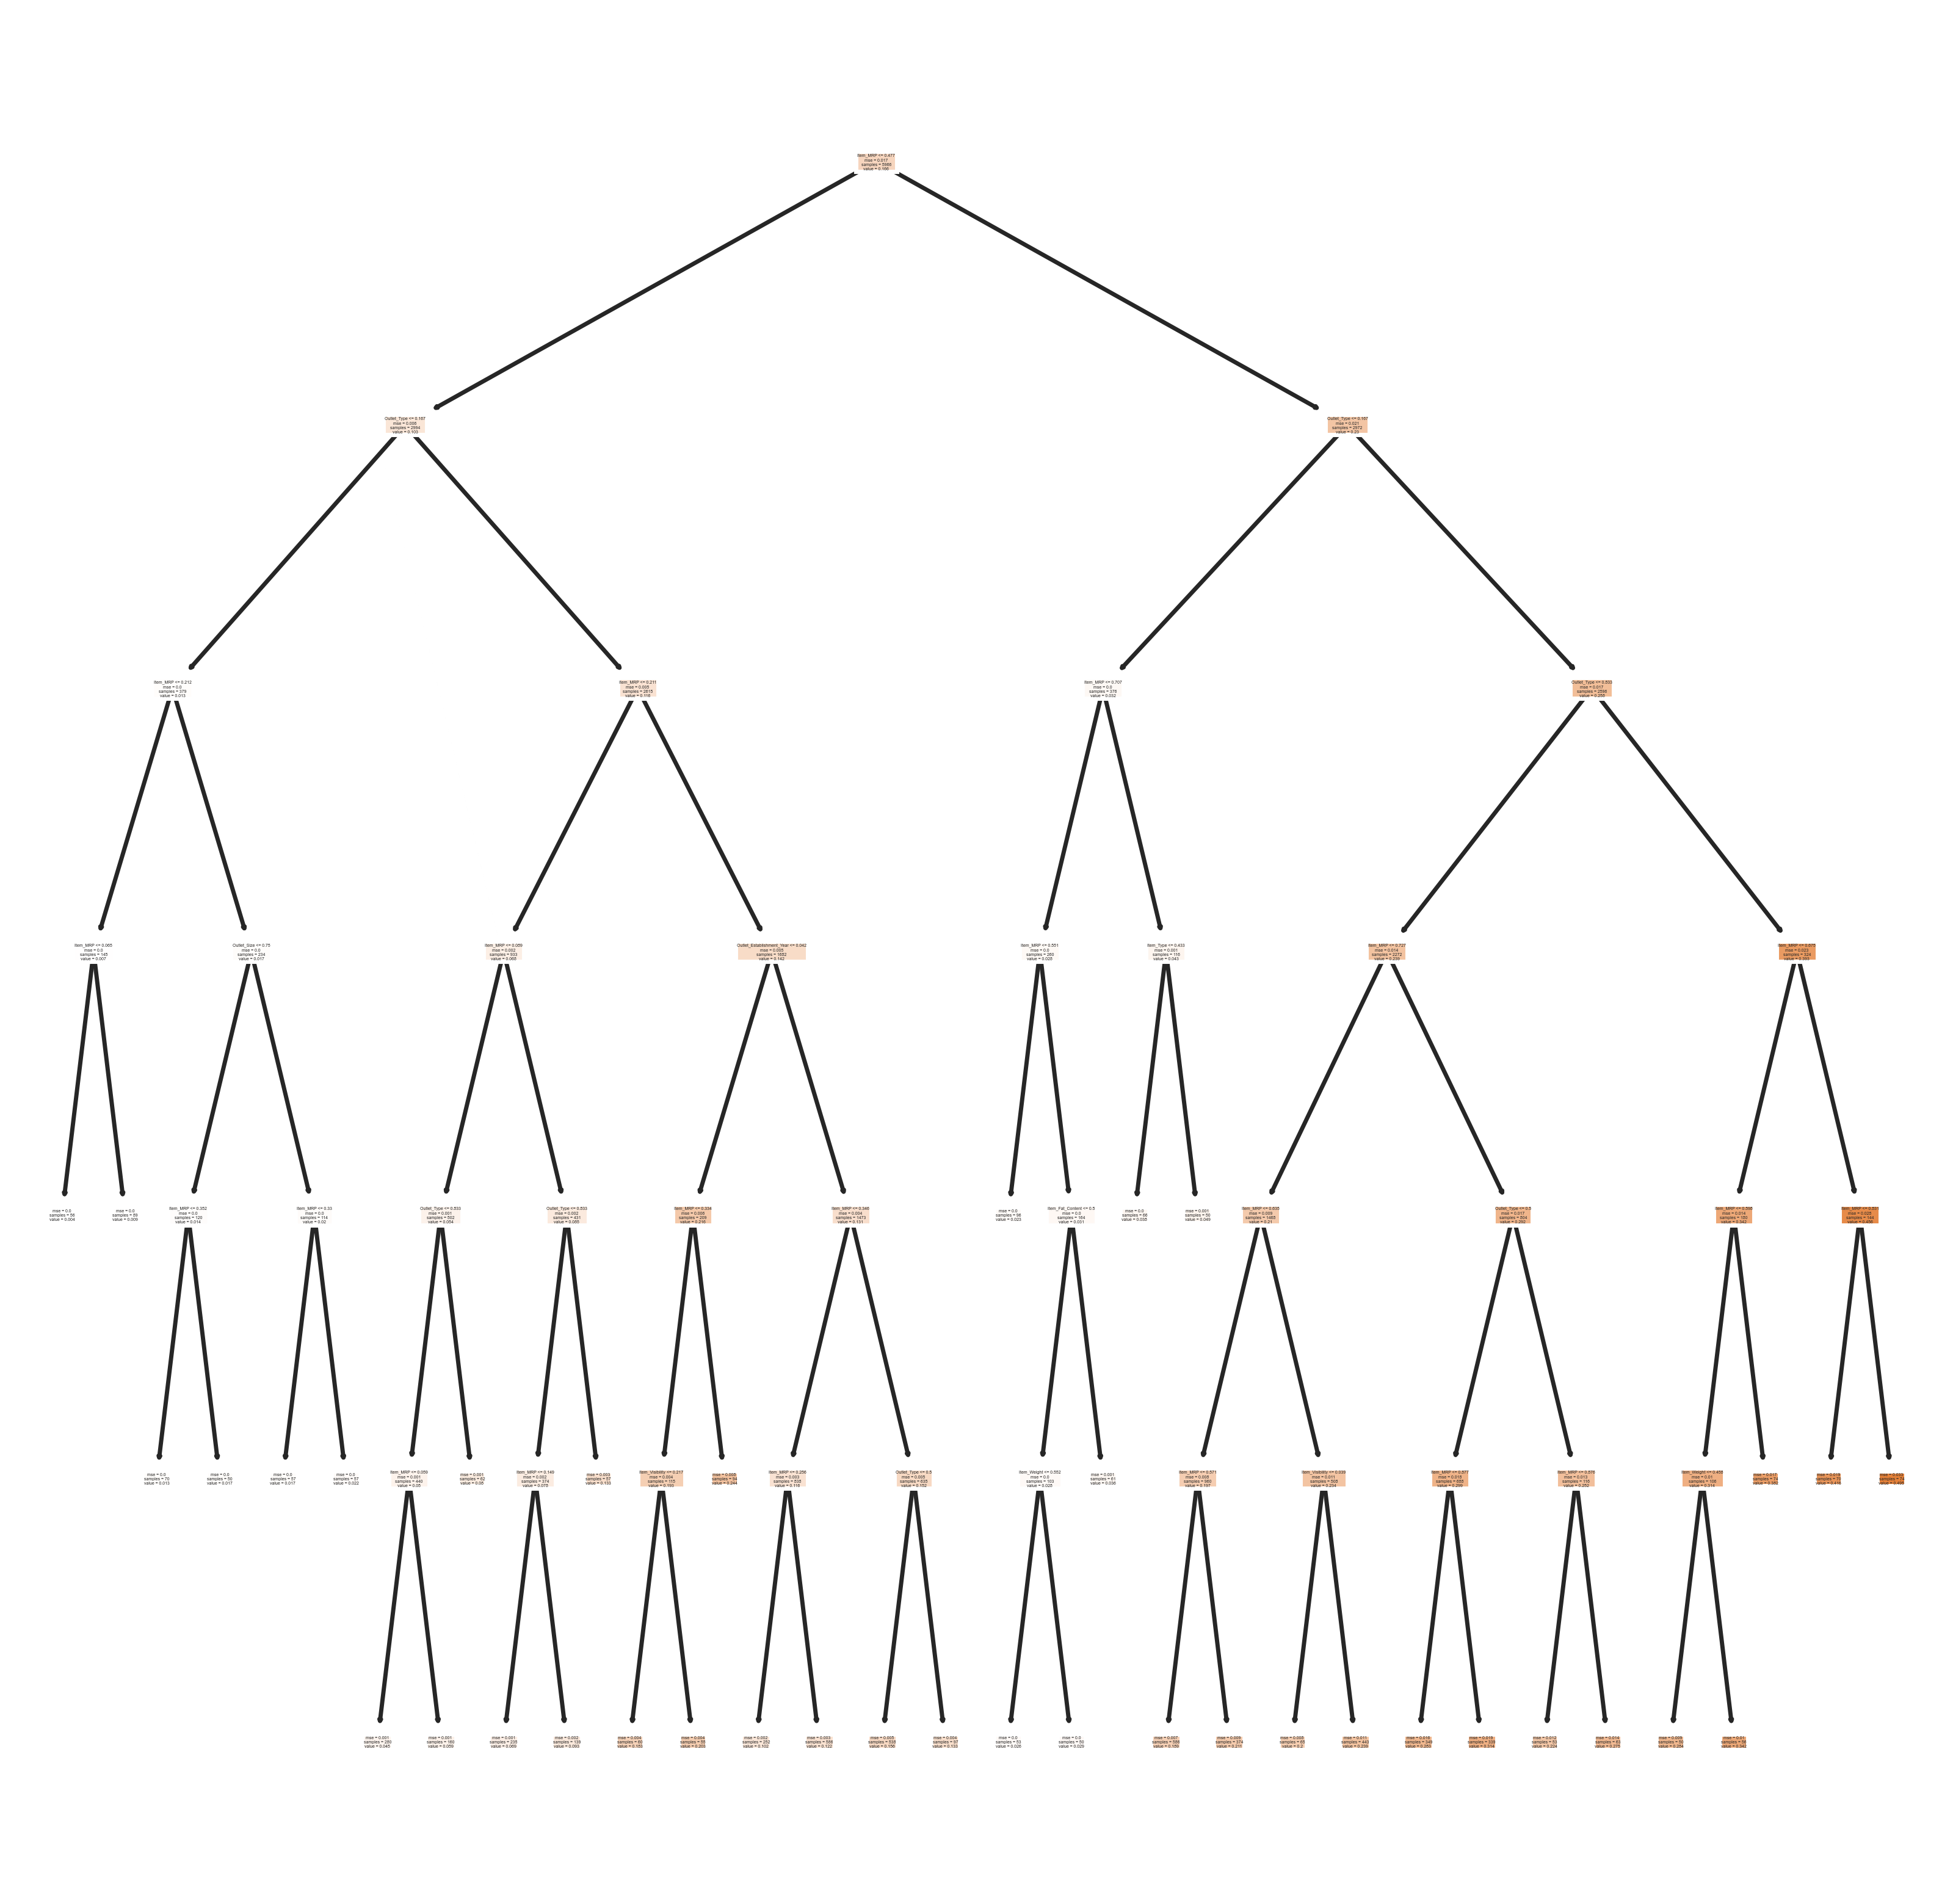

In [32]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(dtr,
           feature_names = x.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

### RandomForest Regressor (Bagging)

In [33]:
# ## Finding the best hyperparametrs for the decision tree using gridsearch

# # Building Model
# rfr = RandomForestRegressor().fit(x_train,y_train)

# params = {
#     'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,20,30],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,100,200],
#     'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,25,30,50,100,200]}

# grid_search = GridSearchCV(estimator=rfr,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(x_train, y_train)

# # Finding best estimator
# grid_search.best_estimator_

In [34]:
def best_para_rfr(depth,min_leaf_sample,n_estimators):
    mse = []
    rmse = []
    depth_l = []
    n_estimators_l = []
    min_leaf_sample_l = []
    train_acc =[]
    test_acc = []
    for i in depth:
        for j in min_leaf_sample:
            for k in n_estimators:
                rfr = RandomForestRegressor(max_depth=i,min_samples_leaf=j,n_estimators = k).fit(x_train,y_train)
                tr = rfr.score(x_train,y_train) 
                te = rfr.score(x_test,y_test)
                p = rfr.predict(x_test)
                me = mean_squared_error(y_test,p)
                rms = mean_squared_error(y_test,p,squared = False)

                mse.append(me)
                rmse.append(rms)
                train_acc.append(tr*100)
                test_acc.append(te*100)
                depth_l.append(i)
                min_leaf_sample_l.append(j)
                n_estimators_l.append(k)

    d = pd.DataFrame({'Depth':depth_l,
                      'Min_leaf_Sample':min_leaf_sample_l,
                      'Estimators':n_estimators_l,
                     'Train_acc':train_acc,
                     'Test_acc':test_acc,
                     'MSE':mse,
                     'RMSE':rmse})
    
    return(d)

In [35]:
depth = [2,3,4,5,6,7,8,9,10]
samples = [1,2,3,4,5,6,7,8,9]
estimators = [1,2,3,4,5,6,7,8,9,10]
best = best_para_rfr(depth,samples,estimators)
best.sort_values(by='RMSE',ascending=True)

,Depth,Min_leaf_Sample,Estimators,Train_acc,Test_acc,MSE,RMSE
519,7,7,10,63.708447,60.327082,0.006590,0.081178
354,5,9,5,60.913770,60.272803,0.006599,0.081234
478,7,3,9,63.948361,60.189353,0.006613,0.081319
416,6,6,7,62.116660,60.170203,0.006616,0.081339
277,5,1,8,61.058531,60.163257,0.006617,0.081346
...,...,...,...,...,...,...,...
60,2,7,1,42.150961,42.962419,0.009474,0.097336
30,2,4,1,42.292742,42.884930,0.009487,0.097402
40,2,5,1,42.480716,42.773289,0.009506,0.097497
0,2,1,1,41.943179,42.632855,0.009529,0.097617


In [36]:
# Building Model
rfr = RandomForestRegressor(max_depth=7,min_samples_leaf=6,n_estimators=7).fit(x_train,y_train)

# Linear Pred
rfr_pred = rfr.predict(x_test)
rfr_pred

array([0.06584058, 0.10583681, 0.04945873, ..., 0.02559466, 0.02977972,
       0.24162922])

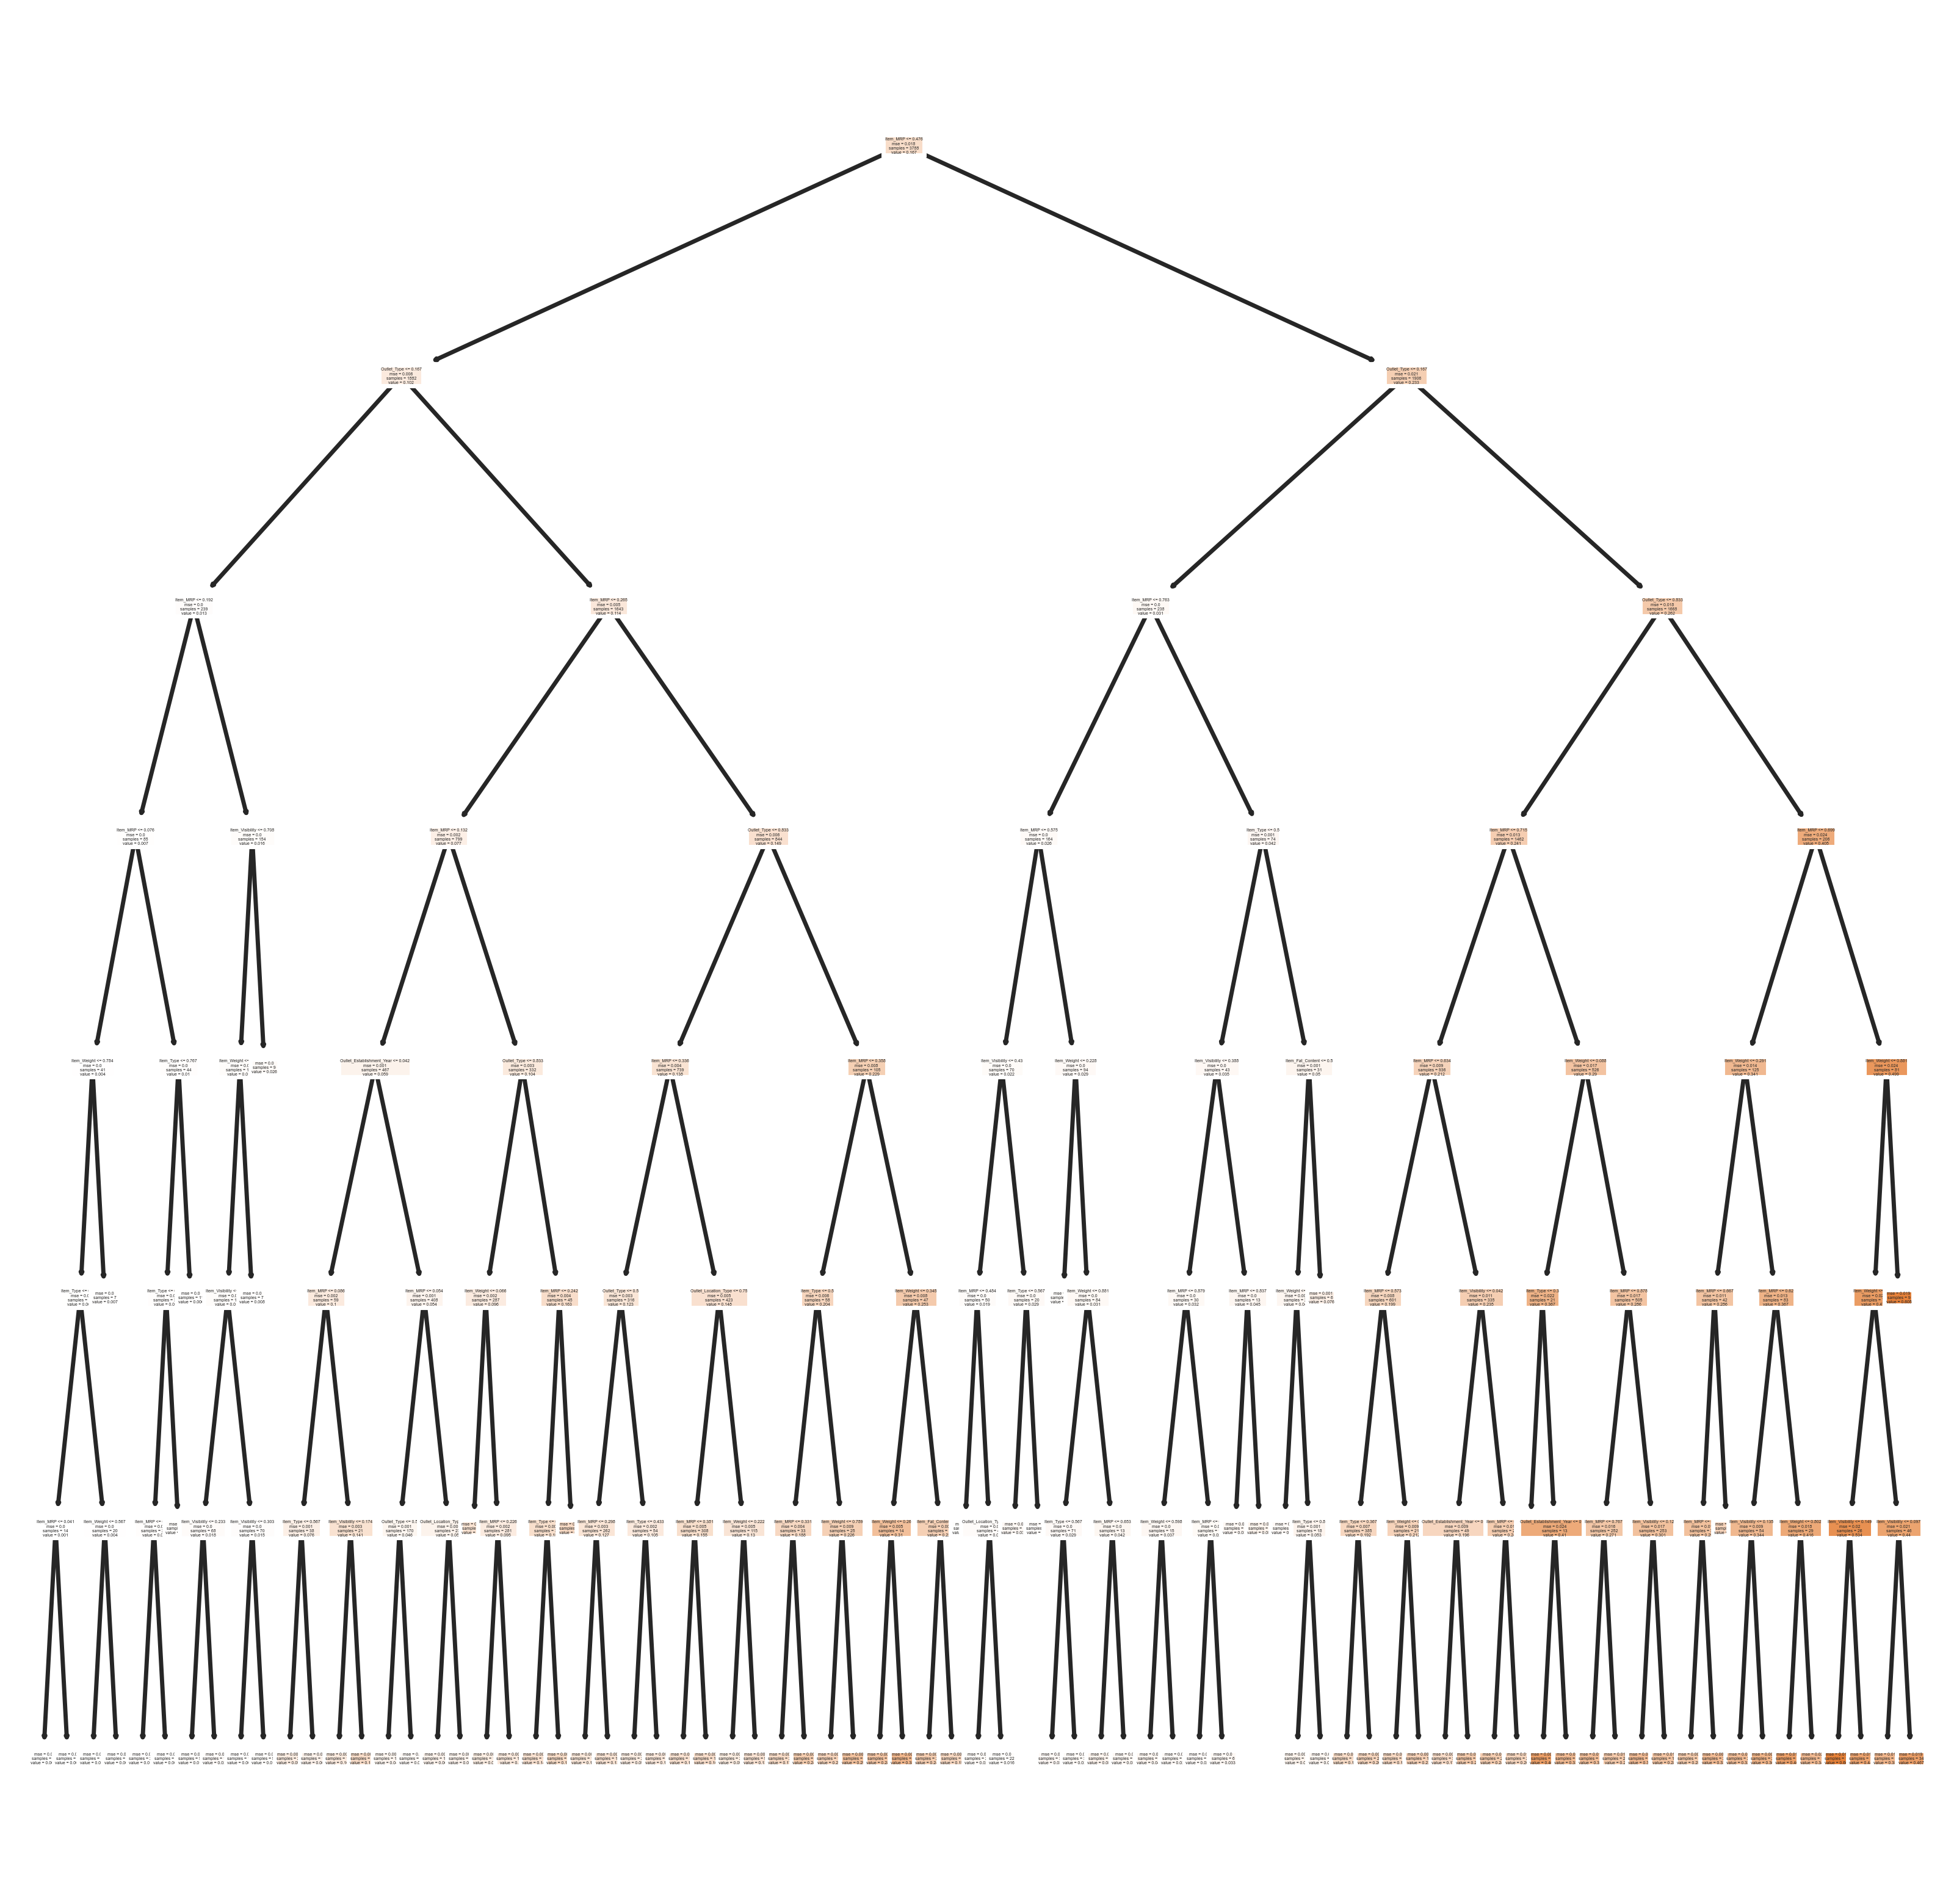

In [37]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(rfr[0],
           feature_names = x.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

## Adaboost - Boosting Ensemble

In [38]:
def best_para_ab(n_estimators):
    mse = []
    rmse = []
    n_estimators_l = []
    train_acc =[]
    test_acc = []
    for i in n_estimators:
        ab = AdaBoostRegressor(n_estimators=i).fit(x_train,y_train)
        tr = ab.score(x_train,y_train) 
        te = ab.score(x_test,y_test)
        p = ab.predict(x_test)
        me = mean_squared_error(y_test,p)
        rms = mean_squared_error(y_test,p,squared = False)

        mse.append(me)
        rmse.append(rms)
        train_acc.append(tr*100)
        test_acc.append(te*100)
        n_estimators_l.append(i)

    d = pd.DataFrame({
                      'Estimators':n_estimators_l,
                     'Train_acc':train_acc,
                     'Test_acc':test_acc,
                     'MSE':mse,
                     'RMSE':rmse})
    
    return(d)

In [39]:
estimators = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
best = best_para_ab(estimators)
best.sort_values(by='RMSE',ascending=True)

,Estimators,Train_acc,Test_acc,MSE,RMSE
4,5,57.301542,56.868198,0.007164,0.084643
6,7,56.604661,56.422252,0.007239,0.085080
5,6,56.047510,55.843475,0.007335,0.085643
7,8,56.844790,55.821369,0.007338,0.085664
3,4,55.410047,55.128716,0.007453,0.086333
8,9,55.904027,55.119232,0.007455,0.086342
9,10,55.766644,55.086410,0.007460,0.086374
2,3,54.737530,54.470006,0.007563,0.086964
0,1,52.696575,52.485097,0.007893,0.088840
1,2,52.864641,51.638342,0.008033,0.089628


In [40]:
# Model Building 

ab = AdaBoostRegressor(n_estimators=5).fit(x_train,y_train)
ab_pred = ab.predict(x_test)
ab_pred

array([0.07838947, 0.10313666, 0.07838947, ..., 0.02734707, 0.03720719,
       0.16287374])

### Stacking Model using the best hyperparameters

In [41]:
# Creating the stacking model

l0 = list()
l0.append(('rfr', rfr))
l0.append(('knn',KNeighborsRegressor()))
l0.append(('dtr',dtr))

st = StackingRegressor(estimators = l0,final_estimator = lin_model,cv = 5).fit(x_train,y_train)

In [42]:
st_pred = st.predict(x_test)
st_pred

array([0.06661049, 0.10769814, 0.04744818, ..., 0.03285959, 0.032745  ,
       0.19559395])

In [43]:
rfr.score(x_test,y_test)

0.5945410556870626

### Comparing all the models using visuals

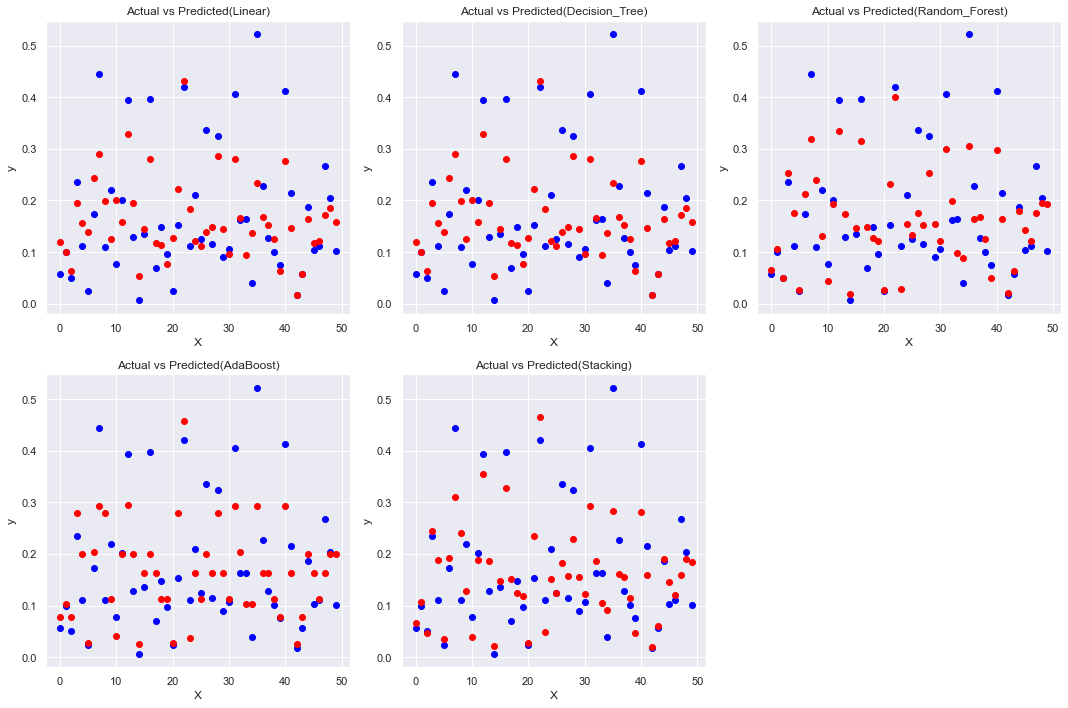

In [44]:

fig,ax = plt.subplots(figsize = (15,10))

plt.subplot(231)
x1 = list(np.arange(0,len(y_test)))    # Creating the index numbers 
plt.scatter(x1[:50],y_test[:50],color = 'blue')  # Scatter of actual test data
plt.scatter(x1[:50],lin_pred[:50],color = 'red')   # Scatter of predicted data
plt.title('Actual vs Predicted(Linear)')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(232)
x1 = list(np.arange(0,len(y_test)))    # Creating the index numbers 
plt.scatter(x1[:50],y_test[:50],color = 'blue')  # Scatter of actual test data
plt.scatter(x1[:50],dtr_pred[:50],color = 'red')   # Scatter of predicted data
plt.title('Actual vs Predicted(Decision_Tree)')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(233)
x1 = list(np.arange(0,len(y_test)))    # Creating the index numbers 
plt.scatter(x1[:50],y_test[:50],color = 'blue')  # Scatter of actual test data
plt.scatter(x1[:50],rfr_pred[:50],color = 'red')   # Scatter of predicted data
plt.title('Actual vs Predicted(Random_Forest)')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(234)
x1 = list(np.arange(0,len(y_test)))    # Creating the index numbers 
plt.scatter(x1[:50],y_test[:50],color = 'blue')  # Scatter of actual test data
plt.scatter(x1[:50],ab_pred[:50],color = 'red')   # Scatter of predicted data
plt.title('Actual vs Predicted(AdaBoost)')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(235)
x1 = list(np.arange(0,len(y_test)))    # Creating the index numbers 
plt.scatter(x1[:50],y_test[:50],color = 'blue')  # Scatter of actual test data
plt.scatter(x1[:50],st_pred[:50],color = 'red')   # Scatter of predicted data
plt.title('Actual vs Predicted(Stacking)')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### Comparing all the models using Loss Functions

In [45]:
## Creating dataframe of predicted vs actual
df_pred1 = pd.DataFrame({'Actual':y_test,
                        'LR':lin_pred,
                        'DTR':dtr_pred,
                        'RFR':rfr_pred,
                        'AB':ab_pred,
                        'ST':st_pred})

df_pred1

,Actual,LR,DTR,RFR,AB,ST
3235,0.056819,0.119387,0.119387,0.065841,0.078389,0.066610
6598,0.099969,0.099348,0.099348,0.105837,0.103137,0.107698
2633,0.050342,0.063235,0.063235,0.049459,0.078389,0.047448
1562,0.235030,0.194964,0.194964,0.253173,0.278735,0.243997
6602,0.111700,0.156415,0.156415,0.176001,0.199402,0.188399
...,...,...,...,...,...,...
2512,0.103030,0.101696,0.101696,0.059864,0.078389,0.068552
7462,0.148628,0.239624,0.239624,0.201148,0.204557,0.192809
8336,0.010048,0.087652,0.087652,0.025595,0.027347,0.032860
6469,0.056411,0.116881,0.116881,0.029780,0.037207,0.032745


In [46]:
def metrics(model,x_train,y_train,x_test,y_test):
    mse = []
    rmse = []
    train_acc = []
    test_acc = []
    for i in model:
        tr = i.score(x_train,y_train) 
        te = i.score(x_test,y_test)
        p = i.predict(x_test)
        me = mean_squared_error(y_test,p)
        rms = mean_squared_error(y_test,p,squared = False)
        mse.append(me)
        rmse.append(rms)
        train_acc.append(tr*100)
        test_acc.append(te*100)
        
    d = pd.DataFrame({'Model':['Liner_Reg','Decision_tree','Random_Forest','AdaBoost','Stacked'],
                     'Train_acc':train_acc,
                     'Test_acc':test_acc,
                     'MSE':mse,
                     'RMSE':rmse})
    
    return(d)     

In [48]:
# Finding the best models using rmse and mse score
models = [lin_model,dtr,rfr,ab,st]
metrics(models,x_train,y_train,x_test,y_test)

,Model,Train_acc,Test_acc,MSE,RMSE
0,Liner_Reg,50.028701,49.904811,0.008321,0.091220
1,Decision_tree,61.076078,60.237693,0.006605,0.081270
2,Random_Forest,63.414556,59.454106,0.006735,0.082067
3,AdaBoost,56.807044,56.568774,0.007214,0.084936
4,Stacked,63.006436,60.443701,0.006571,0.081059


### Comparing all the models using Cross Validation

In [47]:
def cross_val_Kfold(model,x,y):
    mse = []
    rmse = []
    score = []
    cv = KFold(n_splits=10,shuffle = False,random_state= None)
    for i in models:
        r2 = cross_val_score(i,x,y,cv=cv,scoring='r2')
        r2 = r2.mean()
        ms = cross_val_score(i,x,y,cv=cv,scoring = 'neg_mean_squared_error')
        ms = ms.mean()
        rms = np.sqrt(abs(ms))
        mse.append(ms)
        rmse.append(rms)
        score.append(r2*100)
        
    d = pd.DataFrame({'Model':['Liner_Reg','Decision_tree','Random_Forest','AdaBoost','Stacked'],
                      'R2':score,
                     'MSE':mse,
                     'RMSE':rmse})
    return (d)

In [49]:
# Checking the cross vaidation
cross_val_Kfold(models,x,y)

,Model,R2,MSE,RMSE
0,Liner_Reg,49.783267,-0.008561,0.092527
1,Decision_tree,59.305065,-0.006928,0.083234
2,Random_Forest,59.067520,-0.006958,0.083417
3,AdaBoost,55.996830,-0.007527,0.086756
4,Stacked,59.411259,-0.006905,0.083097


### The best model is the Stacking model
### Using the model trying to predict the validation set

In [50]:
vali_test = validation.drop(columns='Item_Outlet_Sales')

In [51]:
vali_test.reset_index(inplace = True,drop=True)

In [52]:
## Stacking model

validate = st.predict(vali_test)
validate = pd.DataFrame(validate,index=vali_test.index)

In [53]:
df_vali = pd.concat([vali_test,validate],axis = 1)
df_vali

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,0
0,0.964275,0.0,0.012284,0.866667,0.325012,0.583333,0.5,0.0,0.333333,0.123964
1,0.222983,1.0,0.107301,0.266667,0.237819,0.916667,1.0,0.5,0.333333,0.106504
2,0.598095,0.0,0.295552,0.733333,0.893316,0.541667,0.5,1.0,0.000000,0.053917
3,0.164335,0.0,0.036370,0.866667,0.525233,0.916667,1.0,0.5,0.333333,0.184503
4,0.538553,1.0,0.354122,0.266667,0.861381,0.000000,0.5,1.0,1.000000,0.471312
...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,1.0,0.030546,0.866667,0.467004,0.500000,1.0,0.0,0.333333,0.161373
5677,0.181304,1.0,0.429216,1.000000,0.585126,1.000000,0.5,1.0,0.666667,0.210996
5678,0.324204,0.0,0.215364,0.533333,0.371199,0.708333,1.0,0.5,0.333333,0.148903
5679,0.639774,1.0,0.188211,0.200000,0.778154,0.916667,1.0,0.5,0.333333,0.282638


### From the analysis we can understand that the stacking model is best when compared to other models for this dataset

* Eventhough the stacking model has high score than the other models, the score is kind of very low(61 %).
* The main reason for this miht me be the less data that is provied for the model for training and there seems to be lot outliers in the Sales
* The data in the Sales column cannot be said as an outlier because the sales for that specific features can be high
* I also think that the correlation between the target and independant variable is not strong enough to make the model to predict better
